 # Méthode 1 : PL en "ligne"

In [1]:
from gurobipy import *
# Instanciation du modèle
m = Model("Simple PL modelling")
# Création de 2 variables continues v0 et v1
v0 = m.addVar()
v1 = m.addVar()
# maj du modèle
m.update()
# Ajout de 3 constraintes 
m.addConstr(v0 - v1 <= 4)
m.addConstr(v0 + v1 <= 4)
m.addConstr(-0.25*v0 + v1 <= 1)
# Fonction Objectif
m.setObjective(v1, GRB.MAXIMIZE)         
# Paramétrage (mode mute)
m.params.outputflag = 0
# Résolution du PL
m.optimize()
print("La solution optimale est (v0, v1) = {} avec pour objectif z = {}".format((v0.x, v1.x), m.objVal))

Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-29
La solution optimale est (v0, v1) = (2.4, 1.6) avec pour objectif z = 1.6


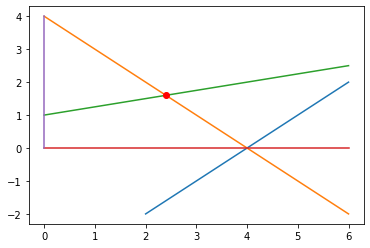

In [2]:
import matplotlib.pyplot as pyplot
pyplot.plot([2,6], [-2,2])
pyplot.plot([0,6], [4,-2])
pyplot.plot([0,6], [1,2.5])
pyplot.plot([0, 6], [0, 0])
pyplot.plot([0, 0], [0, 4])
pyplot.plot(v0.x, v1.x, 'ro')
pyplot.show()

# Méthode 2 : PL sous forme matricielle

In [3]:
import numpy as np

# Instanciation du modèle
m = Model("PL modelling using matrix")

# Création d'un vecteur de 2 variables continues
v = m.addMVar(shape=2)

# maj du modèle
m.update()

# Contraintes
A = np.array([ [1,    -1],
               [1,     1],
               [-0.25, 1] ])
b = np.array([4, 4, 1])
m.addConstr(A @ v <= b)

# Fonction Obectif
obj = np.array([0.0, 1.0])
m.setObjective(obj @ v, GRB.MAXIMIZE)

# Paramétrage (mode mute)
m.params.outputflag = 0

# Résolution du PL
m.optimize()

# Affichage en mode texte du PL
print(m.display())

print("La solution optimale est (v0, v1) = {} avec pour objectif z = {}".format((v.X), m.objVal))

None
La solution optimale est (v0, v1) = [2.4 1.6] avec pour objectif z = 1.6


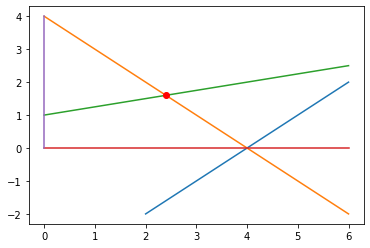

In [4]:
pyplot.plot([2,6], [-2,2])
pyplot.plot([0,6], [4,-2])
pyplot.plot([0,6], [1,2.5])
pyplot.plot([0, 6], [0, 0])
pyplot.plot([0, 0], [0, 4])
pyplot.plot(v.x[0], v.x[1], 'ro')
pyplot.show()

# Méthode 3 : Un autre PL

In [5]:
# Instanciation du modèle
m = Model("Un autre PL")

# Variables
x1 = m.addVar(name="x1", lb=0, ub=10)
x2 = m.addVar(name="x2", lb=0)
x3 = m.addVar(name="x3", lb=0)

# maj
m.update()

# Contraintes
m.addConstr(-x1 + x2 + 3*x3 <= -5)
m.addConstr(x1 + 3*x2 - 7*x3 <= 10)
m.setObjective(x1 + 2*x2 + 5*x3, GRB.MAXIMIZE)

# Paramétrage (mode mute)
m.params.outputflag = 0

# Résolution
m.optimize()

# Priting the optimal solutions obtained
print("Optimal Solutions")
print("x1=", x1.x)
print("x2=", x2.x)
print("x3=", x3.x)
print("Objective=", m.objVal)

Optimal Solutions
x1= 10.0
x2= 2.1875
x3= 0.9375
Objective= 19.0625


In [6]:
# Instanciation du modèle
m = Model("PL modelling using matrix")

# Vecteur de variables
x = m.addMVar(shape=3)
m.update()

# Coefficients membre gauche Contraintes
A = np.array([ [-1, 1, 3],
               [ 1, 3,-7],
               [ 1, 0, 0]
             ])

# Coefficients membre droit Contraintes
b = np.array([-5, 10, 10])
m.addConstr(A @ x <= b)

# Fonction Obectif
obj = np.array([1, 2, 5])
m.setObjective(obj @ x, GRB.MAXIMIZE)

m.params.outputflag = 0
# maj
m.update()
# Affichage en mode texte du PL
print(m.display())

# Résolution du PL
m.optimize()
print("La solution optimale est (x1, x2, x3) = {} avec pour objectif z = {}".format((x.X), m.objVal))


None
La solution optimale est (x1, x2, x3) = [10.      2.1875  0.9375] avec pour objectif z = 19.0625


In [7]:
# Lecture de fichier
m = read('model.lp')
m.params.outputflag = 0
# Affichage
print(m.display())
# Résolution
m.optimize()
# Récupérer les valeurs des variables
x_values = [var.x for var in m.getVars()]
print("La solution optimale est (x1, x2, x3) = {} avec pour objectif z = {}".format(x_values, m.objVal))

Read LP format model from file model.lp
Reading time = 0.00 seconds
: 2 rows, 3 columns, 6 nonzeros
None
La solution optimale est (x1, x2, x3) = [10.0, 2.1875, 0.9375] avec pour objectif z = 19.0625


# À VOUS DE JOUER

Implémenter et résoudre suivant chacune des 3 méthodes détaillées ci-dessus les programmes linéaires qui suivent :

$(P_1)$
Maximiser $x_1 + x_2$

$S/C :$

$2x_1 + x_2 \leq 14$

$-x_1 + 2x_2 \leq 8$

$2x_1 - x_2 \leq 10$

$x_1 \in \mathbb{R}^+, \,x_2 \in \mathbb{R}^+$



$(P_2)$
Minimiser $14x_1 + 8x_2 + 10x_3$

$S/C :$

$2x_1 - x_2 + 2 \geq 1$

$x_1 + 2x_2 - x_3 \geq 1$


$x_1 \in \mathbb{R}^+, \,x_2 \in \mathbb{R}^+, \, x_3 \in \mathbb{R}^+$


$(P_3)$
Maximiser $160A + 300B + 500C$

$S/C:$

$3A + 3.5B + 5C \leq 1800$

$4A + 5B + 8C \leq 2400$

$A + 1.5B + 8C \leq 720$

$A \geq 100$

$B \geq 150$

$C \geq 75$

$A, B, C \in \mathbb{N}$


$(P_4)$
Maximiser $c^{T}x$

$S/C:$

$Ax \leq b$

$x \geq 0$

avec : 
$x = \begin{pmatrix} x_1\\x_2 \end{pmatrix}$

$A = \begin{pmatrix} 1 & 1\\1 & 3 \\0 & 3 \end{pmatrix}$

$b = \begin{pmatrix} 150\\210\\180 \end{pmatrix}$

$c = \begin{pmatrix} 300\\500 \end{pmatrix}$